In [299]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import *
from src.loss_functions import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.utils import shuffle as sk_shuffle

In [300]:
from tensorflow.keras.datasets.fashion_mnist import load_data as load_data_MNIST

(x_train, y_train), (x_test, y_test) = load_data_MNIST() # MNIST

In [301]:
x_train.shape

(60000, 28, 28)

In [302]:
x_train, y_train = sk_shuffle(x_train, y_train)
x_test, y_test = sk_shuffle(x_test, y_test)

In [303]:
x_train = x_train / 255
x_test = x_test / 255

In [304]:
x_train_expanded = np.expand_dims(x_train, 1)
x_test_expanded = np.expand_dims(x_test, 1)

# x_train_expanded = np.einsum('bhwc -> bchw', x_train)
# x_test_expanded = np.einsum('bhwc -> bchw', x_test)

In [305]:
le = OneHotEncoder(sparse_output=False)

y_train_encoded = le.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = le.fit_transform(y_test.reshape(-1, 1))

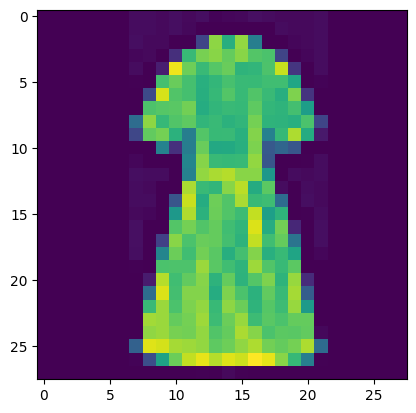

In [306]:
plt.imshow(np.einsum("chw -> hwc", x_train_expanded[0]))

In [307]:
model = Sequential(
    input_size=(1, 28, 28),
    output_size=10
)

In [308]:
model.add(Conv2D(
    n_outputs=1,
    filter_size=5,
    stride=1,
    padding=2
))
model.add(Activation(ReLU()))
model.add(Conv2D(
    n_outputs=1,
    filter_size=5,
    stride=1,
    padding=2
))
model.add(Activation(ReLU()))
# model.add(Conv2D(
#     n_outputs=1,
#     filter_size=3,
#     stride=2,
#     padding=0
# ))
# model.add(Activation(ReLU()))
model.add(Flatten())
model.add(Linear(n_outputs=120))
model.add(Activation(ReLU()))
model.add(Linear(n_outputs=84))
model.add(Activation(ReLU()))
model.add(Linear(n_outputs=10))
model.add(Activation(Softmax()))

In [309]:
model.layers[0].input_size, model.layers[0].output_size

((1, 28, 28), (1, 28, 28))

In [310]:
model.layers[1].input_size, model.layers[1].output_size

((1, 28, 28), (1, 28, 28))

In [311]:
model.layers[2].input_size, model.layers[2].output_size

((1, 28, 28), (1, 28, 28))

In [312]:
for layer in model.layers:
    print(layer)

Conv2D(input size: (1, 28, 28), output size: (1, 28, 28), filter size: 5, stride: 1, padding: 2)
Activation(ReLU)
Conv2D(input size: (1, 28, 28), output size: (1, 28, 28), filter size: 5, stride: 1, padding: 2)
Activation(ReLU)
Flatten()
Linear(inputs: 784, outputs: 120)
Activation(ReLU)
Linear(inputs: 120, outputs: 84)
Activation(ReLU)
Linear(inputs: 84, outputs: 10)
Activation(Softmax)


In [316]:
model.fit(
    [x_train_expanded[:10000], y_train_encoded[:10000]],
    epochs=20,
    learning_rate=0.00001,
    loss_function=CrossEntropy(),
    batch_size=500,
    verbose=True,
    validation_data=[x_test_expanded[:100], y_test_encoded[:100]]
)

100%|██████████| 20/20 [03:14<00:00,  9.75s/it,  Train loss: 0.18179101354841384 Val loss: 0.4704874054808241] 


In [317]:
y_pred = model.predict(x_test_expanded)

Czulosc: 0.9958202716823407
Swoistosc: 0.9987577639751553
Accuracy: 0.8264
F1 score: 0.8260386527002727
BA score: 0.8264000000000001


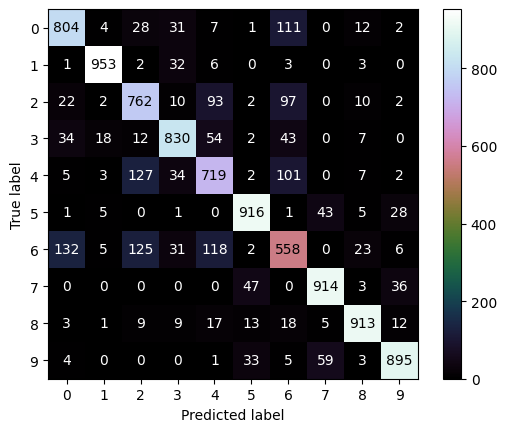

In [319]:
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = y_test

cm_model = confusion_matrix(y_test2, y_pred2, labels=np.unique(y_test2))

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

# fpr, tpr, roc_auc = roc_curve(y_test, y_pred)
#
# rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
# rok_model.plot()

print("Czulosc:", tp_model / (tp_model + fn_model))
print("Swoistosc:", tn_model / (tn_model + fp_model))
print("Accuracy:", accuracy_score(y_test2, y_pred2))

# print("ROC auc:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test2, y_pred2, average='macro'))
print("BA score:", balanced_accuracy_score(y_test2, y_pred2))